In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

tweets_data_path = 'stanlee.json'
# tweets_data_path = 'stanlee.json'
tweets_data = []
tweets_file = open(tweets_data_path, "r")
tweets= pd.DataFrame()
#  json Python library to parse the data, and read the data into an array. 
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

tweets['text'] = list(map(lambda tweet: tweet['text'], tweets_data))
tweets['lang'] = list(map(lambda tweet: tweet['lang'], tweets_data))

print(len(tweets))


13028


In [2]:
import re
def word_in_text(word,tweet):
    count=0
    for tweet in tweets_data:
        #tweet['text'].lower()
        match = re.search(word, tweet['text'])
        if match:
            count = count+1   
            #print(tweet['text'])
    return count

In [3]:
stanlee = word_in_text('stanlee', tweet)
hashtagstanlee = word_in_text('#StanLee', tweet)
Stan_Lee = word_in_text('Stan Lee', tweet)
STANLEE = word_in_text('STANLEE', tweet)
STAN_LEE = word_in_text('STAN LEE', tweet)
hashtagSTANLEE = word_in_text('#STANLEE', tweet)


In [4]:
df_text_lang = pd.DataFrame({'text': tweets['text'], 'lang': tweets['lang'], 'sentiment': None})
only_en_tweet = df_text_lang[df_text_lang['lang'].str.contains("en")]
only_en_tweet = only_en_tweet.drop('lang',axis=1)
#only_en_tweet


In [5]:
from textblob import TextBlob 

In [6]:
def clean_tweet(tweet): 
        ''' 
        Utility function to clean tweet text by removing links, special characters 
        using simple regex statements. 
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", tweet).split())

In [7]:
def get_tweet_sentiment(tweet): 
        ''' 
        Utility function to classify sentiment of passed tweet 
        using textblob's sentiment method 
        '''
        # create TextBlob object of passed tweet text 
        analysis = TextBlob(clean_tweet(tweet)) 
        # set sentiment 
        if analysis.sentiment.polarity > 0: 
            return 'positive'
        elif analysis.sentiment.polarity == 0: 
            return 'neutral'
        else: 
            return 'negative'

In [8]:
sentiments = []
for text in only_en_tweet['text']:
    sentiments.append(get_tweet_sentiment(text))

numPositiveTweets = sentiments.count('positive')
numNegativeTweets = sentiments.count('negative')
numNeutralTweets = sentiments.count('neutral')

In [9]:
print(numPositiveTweets)
print(numNegativeTweets)
print(numNeutralTweets)

3896
726
6482


In [10]:
only_en_tweet['sentiment'] = sentiments

only_en_tweet.head(5)

,sentiment,text
2,neutral,Enough said - Stan the man Lee https://t.co/zH...
3,positive,"""RIP in Peace Stan Lee"" from @MiddleUrinalPod ..."
4,positive,RT @SoWizardPodcast: Check out episode 224 of ...
5,neutral,RT @comicsandpanels: Stan Lee and Steve Ditko ...
7,neutral,RT @STAY_mutuals: Gain STAY Mutuals!💕🌻\n※ rt a...


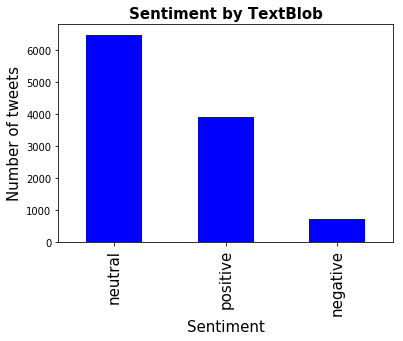

In [11]:
tweets_by_sentiment = only_en_tweet['sentiment'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Sentiment', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Sentiment by TextBlob', fontsize=15, fontweight='bold')
tweets_by_sentiment[:5].plot(ax=ax, kind='bar', color='blue')

In [12]:
def clean_text(text_train):# applies pre- processing on the given text 
 
    text_train = text_train.lower()# converts everything to lower case and splits
    text_train = re.sub(r'[\d,@\'?\.$%_()&*#!;:]',"", text_train) # replaces punctuation and numbers but keeps spaces, needed for tokens 
    text_train = re.sub("[^a-zA-Z]", "", text_train) # keep only words
    #text_train=word_tokenize(text_train) # tokenizes - breaks sentenses into words
    stopWords = set(stopwords.words('english')) # removes words that lack meaning  
    for word in text_train: # removes stopwords
        if word in stopWords:
            text_train.remove(word)
    return text_train

In [13]:
only_en_tweet['text'].iloc[0]

'Enough said - Stan the man Lee https://t.co/zHTLFsJ2vw'

In [14]:
only_en_tweet['text'] = only_en_tweet['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
only_en_tweet['text'] = only_en_tweet['text'].str.replace('[^\w\s]','')
only_en_tweet['text'] = only_en_tweet['text'].str.replace('[0-9]','')
stop = stopwords.words('english')
only_en_tweet['text'] = only_en_tweet['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
only_en_tweet.head(5)

,sentiment,text
2,neutral,enough said stan man lee httpstcozhtlfsjvw
3,positive,rip peace stan lee middleurinalpod sound amazi...
4,positive,rt sowizardpodcast check episode podcast gathe...
5,neutral,rt comicsandpanels stan lee steve ditko httpst...
7,neutral,rt stay_mutuals gain stay mutuals rt follow ev...


In [15]:
freq = pd.Series(' '.join(only_en_tweet['text']).split()).value_counts()[:30]
freq

rt               9646
stan             9225
lee              8653
creator          7659
dies             7530
marvel           4561
spongebob        3908
weeks            3737
later            3723
eentric          3706
httpstcopexlg    3706
stephen          1296
new              1153
kid              1026
comic             984
book              964
ever              898
create            889
genius            886
wanted            885
jewish            873
recently          866
jewishvoice       865
york              864
deceased          863
superheroine      862
stanlee           760
hillenburg        716
really            703
th                669
dtype: int64

In [16]:
top10words = list(freq.index)
only_en_tweet['text'] = only_en_tweet['text'].apply(lambda x: " ".join(x for x in x.split() if x not in top10words))


In [17]:
bottomWords = pd.Series(' '.join(only_en_tweet['text']).split()).value_counts()[-2000:]
bottomWords[:10]

alpobg                1
httpstcogstvqrq       1
httpstcoqemoofssg     1
yip                   1
boundingcomics        1
httpstcoqcujcbwr      1
zodia                 1
themarysue            1
httpstcoomzqvlsi      1
httpstcoonfckdzymo    1
dtype: int64

In [18]:
only_en_tweet['text'] = only_en_tweet['text'].apply(lambda x: " ".join(x for x in x.split() if x not in bottomWords))

In [19]:
only_en_tweet['text'][:5].apply(lambda x: str(TextBlob(x).correct()))

2                    enough said man httpstcozhtlfsjvw
3    rip peace middleurinalpod sound amazing doesn ...
4    sowizardpodcast check episode podcast gather r...
5          comicsandpanels steve disk httpstcorsrdkvtm
7    stay_mutuals gain stay mutual follow everyone ...
Name: text, dtype: object

In [20]:
only_en_tweet['text'].apply(word_tokenize)

2                   [enough, said, man, httpstcozhtlfsjvw]
3        [rip, peace, middleurinalpod, sound, amazing, ...
4        [sowizardpodcast, check, episode, podcast, gat...
5        [comicsandpanels, steve, ditko, httpstcorsrdkvtm]
7        [stay_mutuals, gain, stay, mutuals, follow, ev...
8        [stanleeforever, remix, edm, marvelcomics, dub...
9        [inspired, us, celebrate, years, httpstcoavlkm...
12       [something, breathtaking, episode, dinnerpodca...
13       [bspodnetwork, something, breathtaking, episod...
14                [rap, de, en, via, youtube, thanks, fun]
15       [wreckitralph, ralphwithzoom, join, win, immac...
16       [fallenkiing, spiderman, fighting, jesus, get,...
17       [chrisevans, never, another, decades, provided...
18       [mistaperez, stanleeforever, remix, edm, marve...
19       [salcomicbookpro, mural, popped, street, andre...
20       [aar, lees, cameo, avengers, reapearing, dust,...
21       [kellzallday, yesterday, completed, farewell, .

In [41]:
only_en_tweet = only_en_tweet[only_en_tweet.text.apply(len) > 0]

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer()
bagofwords=vect.fit_transform(only_en_tweet['text']).toarray()
bagofwords.shape

(6516, 6599)

In [43]:
bagofwords

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [44]:
X=pd.DataFrame(bagofwords,columns=vect.get_feature_names())
X.shape

(6516, 6599)

In [45]:
Y=pd.DataFrame(only_en_tweet['sentiment'])
Y.head()

,sentiment
2,neutral
3,positive
4,positive
5,neutral
7,neutral


In [46]:
Y.shape

(6516, 1)

In [47]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20)  

In [48]:
from sklearn import metrics
#the two naive bayes algorithms
from sklearn.naive_bayes import GaussianNB 
from sklearn.naive_bayes import MultinomialNB

In [49]:
algorithm_a=MultinomialNB()

In [50]:
algorithm_a.fit(X_train,Y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [51]:
output=algorithm_a.predict(X_test)

In [54]:
metrics.accuracy_score(Y_test,output)

0.8397239263803681

In [55]:
metrics.confusion_matrix(Y_test,output)

array([[112,   9,  22],
       [ 44, 442,  56],
       [ 54,  24, 541]])

In [56]:
algorithm_b=GaussianNB()

In [57]:
algorithm_b.fit(X_train,Y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None)

In [58]:
output1=algorithm_b.predict(X_test)

In [59]:
metrics.accuracy_score(Y_test,output1)

0.8343558282208589

In [60]:
metrics.confusion_matrix(Y_test,output1)

array([[110,  12,  21],
       [ 75, 429,  38],
       [ 43,  27, 549]])